# Henry Gu - Machine Learning - Homework 2 - Classification

## Dataset
The dataset you will be using is "Income". 

Features:

1. age: continuous.<br>
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.<br>
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br>
5. education-num: continuous.<br>
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br>
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br>
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>
10. sex: Female, Male.<br>
11. capital-gain: continuous.<br>
12. capital-loss: continuous.<br>
13. hours-per-week: continuous.<br>
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.<br>

Target: 

income: whether a person makes over 50K a year.

Prediction task is to determine whether a person makes over 50K a year. (If you transfrom the target as binary values, please make sure >50 is 1, <=50 is 0)

## Load relevant packages and data

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

# Load your training data set and test data
income_df = pd.read_csv('income.csv')
train_df, test_df = train_test_split(income_df, test_size=0.15, shuffle=True, random_state=11)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Clean the dataset: remove the rows with " ?"
train_df = train_df[~train_df.select_dtypes(['object']).eq(' ?').any(1)]
test_df = test_df[~test_df.select_dtypes(['object']).eq(' ?').any(1)]

In [3]:
# Split data into X and y
X = train_df.drop('income', axis=1)
y = train_df['income']

X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

## Data Processing

### Standardization and One-hot Encoding

Standardize the continuous features and convert categorical variables into dummy variables

In [4]:
from sklearn.preprocessing import StandardScaler
# standardize all the continuous features
col_names_continuous = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
X_scaler = StandardScaler()
X_scaler.fit(X[col_names_continuous])
X_new_continuous = pd.DataFrame(X_scaler.transform(X[col_names_continuous]), \
                 columns=col_names_continuous)

# convert all the categorical variables to dummy variables
from sklearn.preprocessing import OneHotEncoder
col_names_categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
X_enc = OneHotEncoder().fit(X[col_names_categorical])
X_new_categorical = X_enc.transform(X[col_names_categorical]).toarray()    
X_new_categorical = pd.DataFrame(X_new_categorical, columns=X_enc.get_feature_names(col_names_categorical))

# combine continuous and categorical variables into X
X = pd.concat([X_new_continuous, X_new_categorical], axis=1)
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,1.703239,-0.031963,-1.571753,-0.118600,-0.188716,-0.003894,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.366486,-0.595901,-0.350774,-0.118600,-0.188716,-2.112731,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.430426,-0.127400,-0.350774,0.965746,-0.188716,-0.003894,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.542901,0.168167,1.277198,-0.118600,-0.188716,-0.003894,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.104269,-1.399508,0.056219,-0.118600,-0.188716,-0.425661,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898,0.430426,-0.893852,1.277198,-0.118600,-0.188716,-0.003894,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2899,-0.018802,0.331170,0.056219,-0.118600,-0.188716,0.333520,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2900,2.077596,-0.760697,-1.978746,-0.118600,-0.188716,-1.353550,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2901,-1.291615,0.377656,0.056219,-0.118600,-0.188716,-0.003894,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
# repeat the above steps for the test data
# ensure we use the objects fit on the training data to transform test data
X_test_continuous = pd.DataFrame(X_scaler.transform(X_test[col_names_continuous]), \
                 columns=col_names_continuous)
X_test_categorical = X_enc.transform(X_test[col_names_categorical]).toarray()
X_test_categorical = pd.DataFrame(X_test_categorical, columns=X_enc.get_feature_names(col_names_categorical))    

X_test = pd.concat([X_test_continuous, X_test_categorical], axis=1)
X_test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,-0.393158,1.225780,1.277198,-0.1186,-0.188716,-0.003894,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.954526,-0.203696,1.277198,-0.1186,-0.188716,-0.003894,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.130941,0.059132,1.277198,-0.1186,-0.188716,0.839641,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.842387,-0.283503,0.463212,-0.1186,-0.188716,3.370246,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.879655,-1.482031,-2.385739,-0.1186,-0.188716,-0.003894,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,0.729912,1.580969,1.277198,-0.1186,-0.188716,0.839641,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
504,1.029397,2.017729,1.684191,-0.1186,-0.188716,-0.003894,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
505,1.478625,-0.645500,-3.199725,-0.1186,-0.188716,-0.003894,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
506,0.580169,-0.945695,1.684191,-0.1186,-0.188716,0.417874,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Splitting training data into training and validation set (the code has been provided)

In [6]:
X_train = X.iloc[:2400,:]
y_train = y.iloc[:2400]
X_val = X.iloc[2400:,:]
y_val = y.iloc[2400:]

Print the shape of your X_train, X_val, X_test

In [7]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(2400, 102)
(503, 102)
(508, 102)


## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [9]:
# predict the output for validation dataset
y_pred = lr.predict(X_val)

#### Implement precision(), recall(), accuracy()

In [10]:
def precision(y, y_preds):
    """
    Return precision, which is TP/(TP+FP)
    """
    # function takes two arrays as inputs
    
    # convert input arrays into a dataframe
    df = pd.DataFrame({'y': y, 'y_pred': y_preds})
    
    # define the second unique value of y_preds as the positive case
    # this will be '1' if y_preds is a binary variable
    df = df[df['y_pred'] == np.unique(y)[1]]
    
    # count TP and FP
    TP = np.count_nonzero(df['y'] == np.unique(y)[1])
    FP = np.count_nonzero(df['y'] == np.unique(y)[0])

    return(TP / (TP + FP))

def recall(y, y_preds):
    """
    Return recall, which is TP/(TP+FN)
    """
    # function takes two arrays as inputs
    
    # convert input arrays into a dataframe    
    df = pd.DataFrame({'y': y, 'y_pred': y_preds})
    
    # define the second unique value of y as the positive case
    # this will be '1' if y is a binary variable
    df = df[df['y'] == np.unique(y)[1]]
    
    # count TP and FN
    TP = np.count_nonzero(df['y_pred'] == np.unique(y)[1])
    FN = np.count_nonzero(df['y_pred'] == np.unique(y)[0])    
    
    return(TP / (TP +  FN))


def accuracy(y, y_preds):
    """
    Return accuracy, which is (TP+TN)/(TP+FP+FN+TN)
    """
    # function takes two arrays as inputs
    
    # convert input arrays into a dataframe
    df = pd.DataFrame({'y': y, 'y_pred': y_preds})
    
    # count TP, TN, FP, FN
    # function assumes the inputs y and y_preds have the same categories
    # function defines the second unique value of y as the positive case
    TP = np.count_nonzero(np.logical_and(df['y'] == np.unique(y)[1], df['y_pred'] == np.unique(y)[1]))
    TN = np.count_nonzero(np.logical_and(df['y'] == np.unique(y)[0], df['y_pred'] == np.unique(y)[0]))
    FP = np.count_nonzero(np.logical_and(df['y'] == np.unique(y)[0], df['y_pred'] == np.unique(y)[1]))                     
    FN = np.count_nonzero(np.logical_and(df['y'] == np.unique(y)[1], df['y_pred'] == np.unique(y)[0]))
    return((TP + TN) / (TP + FP + FN + TN))

Calculate precision, recall, and accuracy of the model:

In [11]:
# Using the predictions to calculate accuracy, precision, recall
print(f"{'Accuracy:':<10} {accuracy(y_val.to_numpy(), y_pred) * 100:>5.2f}%")
print(f"{'Precision:':<10} {precision(y_val.to_numpy(), y_pred) * 100:>5.2f}%")
print(f"{'Recall:':<10} {recall(y_val.to_numpy(), y_pred) * 100:>5.2f}%")

Accuracy:  89.46%
Precision: 62.50%
Recall:    25.42%


### ROC curve

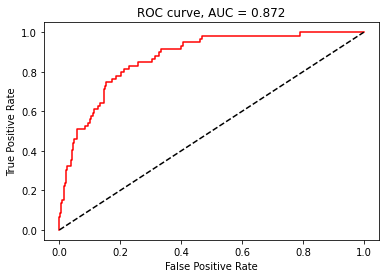

In [12]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.metrics import auc

# compute the roc curve
fpr, tpr, thresholds = roc_curve(y_val, lr.decision_function(X_val), pos_label = np.unique(y_val)[1])
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure()
title = f'ROC curve, AUC = {roc_auc:.3f}'
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(title)
plt.show()

### Tuning Hyperparameters

Test performance on various Logistic Regression models with different penalty, C and solver

In [13]:
def print_results(y_true, y_pred):
    print(f"{'Accuracy:':<10} {accuracy(y_true, y_pred) * 100:>5.2f}%")
    print(f"{'Precision:':<10} {precision(y_true, y_pred) * 100:>5.2f}%")
    print(f"{'Recall:':<10} {recall(y_true, y_pred) * 100:>5.2f}%")
    
def get_logistic_model_prediction(X_train, y_train, X_test, penalty='l2', C=1.0, solver='lbfgs', max_iter=100):
    return LogisticRegression(penalty=penalty, C=C, solver=solver, max_iter=max_iter).fit(X_train,y_train).predict(X_test)

In [14]:
# l1 penalty 
# C = 0.1
# saga solver

print_results(y_val.to_numpy(), get_logistic_model_prediction(X_train, y_train, X_val, penalty='l1', C=0.1, solver='saga', max_iter=5000))

Accuracy:  90.06%
Precision: 84.62%
Recall:    18.64%


In [15]:
# l1 penalty 
# C = 0.1
# liblinear solver

print_results(y_val.to_numpy(), get_logistic_model_prediction(X_train, y_train, X_val, penalty='l1', C=0.1, solver='liblinear'))

Accuracy:  90.06%
Precision: 84.62%
Recall:    18.64%


In [16]:
# l1 penalty 
# C = 0.5
# saga solver

print_results(y_val.to_numpy(), get_logistic_model_prediction(X_train, y_train, X_val, penalty='l1', C=0.5, solver='saga', max_iter=5000))

Accuracy:  89.86%
Precision: 66.67%
Recall:    27.12%


In [17]:
# l1 penalty 
# C = 0.5
# liblinear solver

print_results(y_val.to_numpy(), get_logistic_model_prediction(X_train, y_train, X_val, penalty='l1', C=0.5, solver='liblinear'))

Accuracy:  89.86%
Precision: 66.67%
Recall:    27.12%


In [18]:
# l2 penalty 
# C = 0.1
# saga solver

print_results(y_val.to_numpy(), get_logistic_model_prediction(X_train, y_train, X_val, penalty='l2', C=0.1, solver='saga', max_iter=5000))

Accuracy:  89.07%
Precision: 62.50%
Recall:    16.95%


In [19]:
# l2 penalty 
# C = 0.1
# saga solver

print_results(y_val.to_numpy(), get_logistic_model_prediction(X_train, y_train, X_val, penalty='l2', C=0.1, solver='liblinear'))

Accuracy:  89.26%
Precision: 64.71%
Recall:    18.64%


In [20]:
# l2 penalty 
# C = 0.5
# saga solver

print_results(y_val.to_numpy(), get_logistic_model_prediction(X_train, y_train, X_val, penalty='l2', C=0.5, solver='saga', max_iter=5000))

Accuracy:  89.46%
Precision: 62.50%
Recall:    25.42%


In [21]:
# l2 penalty 
# C = 0.5
# liblinear solver

print_results(y_val.to_numpy(), get_logistic_model_prediction(X_train, y_train, X_val, penalty='l2', C=0.5, solver='liblinear', max_iter=5000))

Accuracy:  89.46%
Precision: 62.50%
Recall:    25.42%


### Final Model
Calculate metrics for the best model given the hyperparameter testing above.

In [22]:
lr_final = LogisticRegression(penalty='l1', C=0.1, solver='saga', max_iter=5000).fit(X, y)
y_pred = lr_final.predict(X_test)

print_results(y_test, y_pred)

Accuracy:  91.14%
Precision: 80.00%
Recall:    22.22%
